In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_edx = pd.read_csv("Datasets/edx_courses.csv")
df_edx.head(1)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online


In [3]:
df_edx.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Se observa presencia de datos nulos.

Se observa que todo esta en tipo de dato object, por lo que habra que hacer transformaciones.

Las columnas que nos brindan informacion muy especifica sobre cada curso seran eliminadas. Estas seran: summary, description, syllabus, url.

La columna instructor también sera eliminada ya que se busca brindar información generalizada para cursos aparte y no sacar conclusiones de esta plataforma en particular.

In [4]:
drop_columns = ['summary', 'institution', 'instructors', 'course_description', 'course_syllabus', 'course_url']
df_edx = df_edx.drop(drop_columns, axis=1)

In [5]:
df_edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          975 non-null    object
 1   n_enrolled     855 non-null    object
 2   course_type    975 non-null    object
 3   Level          975 non-null    object
 4   subject        975 non-null    object
 5   language       975 non-null    object
 6   subtitles      972 non-null    object
 7   course_effort  975 non-null    object
 8   course_length  975 non-null    object
 9   price          975 non-null    object
dtypes: object(10)
memory usage: 76.3+ KB


## Correlaciones

C:\Users\usuario\AppData\Local\Temp\ipykernel_14896\4068508406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_edx.corr()
f:\Programación\Henry\PI2 - DA\myenv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
f:\Programación\Henry\PI2 - DA\myenv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


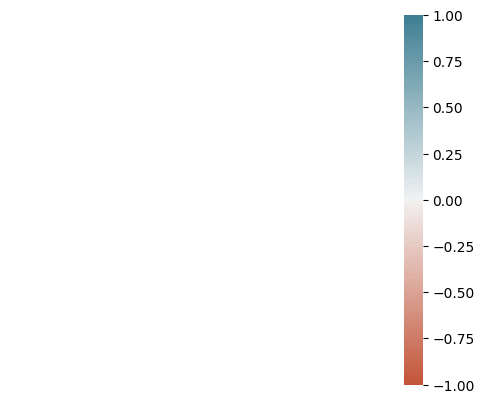

In [6]:
corr_matrix = df_edx.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

Del grafico obtenemos una alta correlacion entre language y subtitles.

## Variables

### title

In [7]:
df_edx['title'].isnull().sum()

0

word cloud

### n_enrolled

In [8]:
df_edx['n_enrolled'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 975 entries, 0 to 974
Series name: n_enrolled
Non-Null Count  Dtype 
--------------  ----- 
855 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [9]:
df_edx['n_enrolled'].isnull().sum()

120

In [10]:
df_edx['n_enrolled'].sort_values().head()

31     1,022,489
29     1,103,777
923       10,019
505       10,118
783       10,127
Name: n_enrolled, dtype: object

In [11]:
df_edx['n_enrolled'] = df_edx['n_enrolled'].str.replace(',', '')

In [12]:
df_edx['n_enrolled'] = pd.to_numeric(df_edx['n_enrolled'], errors='coerce')


In [13]:
df_edx['n_enrolled'] = df_edx['n_enrolled'].fillna(df_edx['n_enrolled'].median())

In [14]:
df_edx['n_enrolled'] = df_edx['n_enrolled'].astype(int)


In [15]:
df_edx['n_enrolled'].isnull().sum()

0

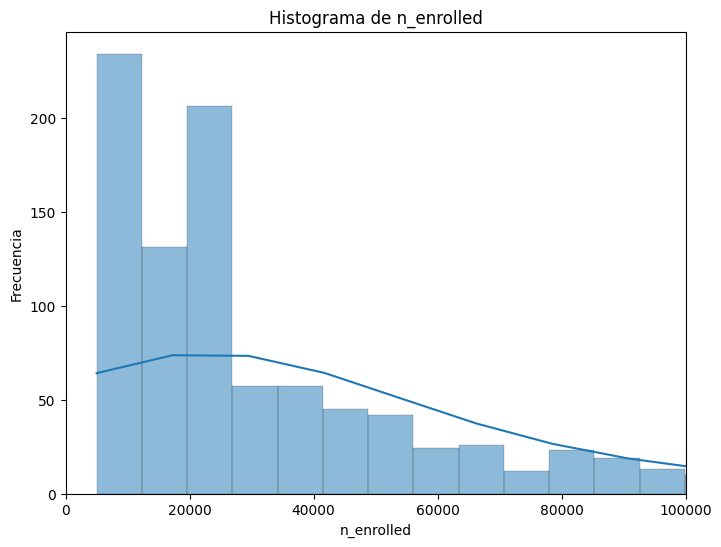

In [16]:
# Creamos el histograma
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.histplot(data=df_edx, x='n_enrolled', kde=True)  # Creación del histograma
plt.title('Histograma de n_enrolled')  # Título del gráfico
plt.xlabel('n_enrolled')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xlim(0, 100000)  # Limitar el rango del eje x
plt.show()  # Mostrar el gráfico

En la variable n_enrolled, se procedio a transformar los valores a enteros, para ellos se rellenaron los 120 NaN por la mediana del conjunto de valores.

Tambien se grafico la distribucion, detectando una amplio rango de valores, los cuales presentan una distribucion tirada hacia la izquierda, es decir que los valores mas frecuentes se hallan en el rango de 0 a 100.000.

### course_type

In [17]:
df_edx['course_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 975 entries, 0 to 974
Series name: course_type
Non-Null Count  Dtype 
--------------  ----- 
975 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [18]:
df_edx['course_type'].describe()

count                         975
unique                          2
top       Self-paced on your time
freq                          917
Name: course_type, dtype: object

In [19]:
df_edx['course_type'].value_counts()

Self-paced on your time                917
Instructor-led on a course schedule     58
Name: course_type, dtype: int64

Se procedera a transformar la columna en booleana. Se le cambiara el nombre a 'on_demand'. A los valores 'Self-paced on your time' se los reemplazara por True, a los otros por False.

In [20]:
df_edx['on_demand'] = df_edx['course_type'].replace({'Self-paced on your time': True, 'Instructor-led on a course schedule': False})


In [21]:
df_edx = df_edx.drop('course_type', axis=1)

In [22]:
df_edx.head(1)

,title,n_enrolled,Level,subject,language,subtitles,course_effort,course_length,price,on_demand
0,How to Learn Online,124980,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,True


### Level

In [23]:
df_edx['Level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 975 entries, 0 to 974
Series name: Level
Non-Null Count  Dtype 
--------------  ----- 
975 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [24]:
df_edx['Level'].describe()

count              975
unique               3
top       Introductory
freq               621
Name: Level, dtype: object

In [25]:
frecuencia = df_edx['Level'].value_counts()

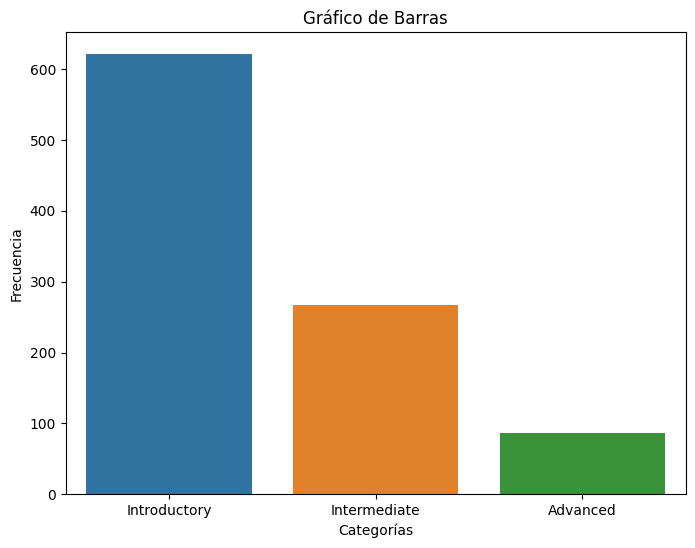

In [26]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.barplot(x=frecuencia.index, y=frecuencia.values)  # Creación del gráfico de barras
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

La columna Level, presenta las categorias de dificultads de los cursos. Esta se encuentra dividida en tres categorias. 

No posee nulos. No requiere de mas transformaciones.

### Subject

In [27]:
df_edx['subject'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 975 entries, 0 to 974
Series name: subject
Non-Null Count  Dtype 
--------------  ----- 
975 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [28]:
df_edx['subject'].value_counts()

Computer Science                166
Business & Management           164
Data Analysis & Statistics       72
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Math                             31
Medicine                         31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            16
Art & Culture                    12
Health & Safety                  11
Law                              10
Science                          10
Design                            8
Energy & Earth Sciences           8
Electronics                       7
Music                             7
Food & Nutrition                  6
Philosophy & Ethics               6
Chemistry                         5
Architecture                

In [29]:
frecuencia = df_edx['subject'].value_counts()

In [30]:
frecuencias_filtradas = frecuencia[frecuencia > 50]


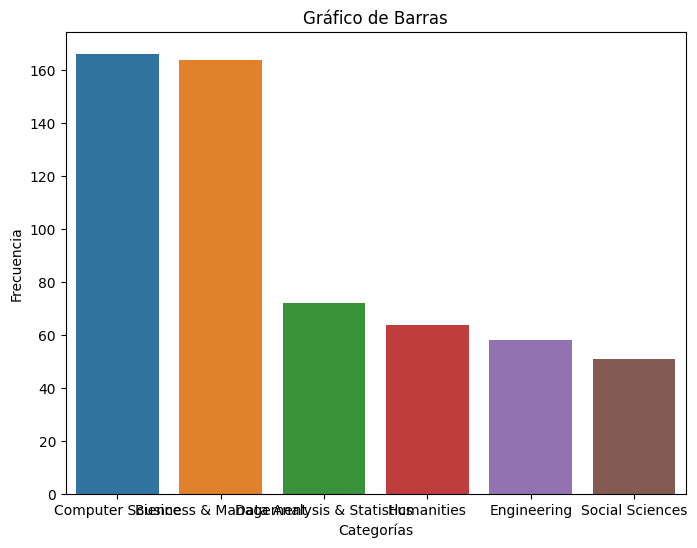

In [31]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.barplot(x=frecuencias_filtradas.index, y=frecuencias_filtradas.values)  # Creación del gráfico de barras
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

La columna no presenta nulos

Hay gran variedad de categorias, por lo que solo se tomará un top.

### Language

In [32]:
df_edx['language'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 975 entries, 0 to 974
Series name: language
Non-Null Count  Dtype 
--------------  ----- 
975 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [33]:
df_edx['language'].value_counts()

English          777
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

In [34]:
df_edx['language'] = df_edx['language'].replace(['Français', 'Italiano', '中文', 'Português','日本語', 'اللغة العربية', 'Deutsch'], 'Otros')


In [35]:
frec = df_edx['language'].value_counts()

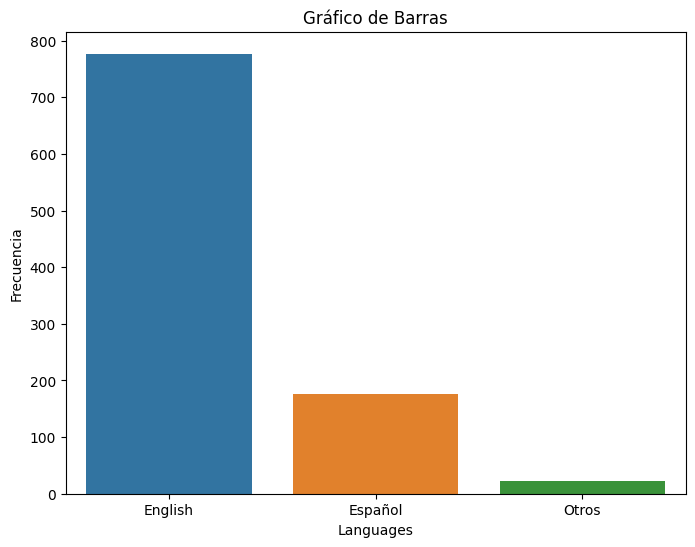

In [36]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.barplot(x=frec.index, y=frec.values)  # Creación del gráfico de barras
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Languages')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

La columna languages presenta el idioma del curso.

Viendo los valores que presentaba y la frecuencia de los mismos, se decide conservar la categoria de ingles y español, ya que son con gran amplitud los mas frecuentes, y el resto agruparlos en una categoria llamada otros.

### Subtitles

In [37]:
df_edx['subtitles'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 975 entries, 0 to 974
Series name: subtitles
Non-Null Count  Dtype 
--------------  ----- 
972 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [38]:
df_edx = df_edx.drop(['subtitles'], axis = 1)

Se decide eliminar la columna de subitutlos por su alta correlatividad con languajes en el heatmap

### Course Effort

In [39]:
df_edx['course_effort'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 975 entries, 0 to 974
Series name: course_effort
Non-Null Count  Dtype 
--------------  ----- 
975 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [40]:
df_edx['course_effort'].value_counts()

2–4 hours per week      108
2–3 hours per week      104
3–5 hours per week      103
3–4 hours per week       91
4–6 hours per week       79
8–10 hours per week      57
1–2 hours per week       55
4–5 hours per week       55
6–8 hours per week       51
5–7 hours per week       28
5–10 hours per week      23
3–6 hours per week       23
1–3 hours per week       22
2–5 hours per week       19
5–8 hours per week       19
5–6 hours per week       15
8–12 hours per week      13
9–10 hours per week      12
1–5 hours per week       10
4–8 hours per week        8
10–12 hours per week      8
4–10 hours per week       7
7–10 hours per week       7
10–20 hours per week      6
2–6 hours per week        5
6–10 hours per week       5
3–7 hours per week        4
10–11 hours per week      3
10–15 hours per week      3
10–14 hours per week      3
6–9 hours per week        2
4–7 hours per week        2
1–10 hours per week       2
11–13 hours per week      2
10–18 hours per week      2
6–12 hours per week 

se decide eliminar el campo course effort ya que se considera información muy subjetiva y poco clara para la elaboracion de conclusiones, ya que presenta rangos de tiempo solapados. Ademas es informacion muy especifica par acada curso

In [41]:
df_edx = df_edx.drop(['course_effort'], axis = 1)

### Course Length

In [42]:
df_edx['course_length'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 975 entries, 0 to 974
Series name: course_length
Non-Null Count  Dtype 
--------------  ----- 
975 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [43]:
df_edx['course_length'].value_counts()

4 Weeks     194
6 Weeks     187
5 Weeks     148
7 Weeks      92
8 Weeks      84
10 Weeks     83
12 Weeks     36
3 Weeks      35
2 Weeks      20
9 Weeks      20
15 Weeks     18
14 Weeks     17
16 Weeks     14
1 Weeks       8
11 Weeks      7
13 Weeks      7
18 Weeks      4
17 Weeks      1
Name: course_length, dtype: int64

In [44]:
df_edx['course_length'] = df_edx['course_length'].str.extract('(\d+)')


In [45]:
df_edx['course_length'] = df_edx['course_length'].astype(int)


In [46]:
df_edx = df_edx.rename(columns={'course_length': 'weeks_duration'})


In [47]:
df_edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           975 non-null    object
 1   n_enrolled      975 non-null    int32 
 2   Level           975 non-null    object
 3   subject         975 non-null    object
 4   language        975 non-null    object
 5   weeks_duration  975 non-null    int32 
 6   price           975 non-null    object
 7   on_demand       975 non-null    bool  
dtypes: bool(1), int32(2), object(5)
memory usage: 46.8+ KB


A la columna 'course_length', se le cambio el nombre por 'weeks_duration' para facilitar la compresion de la información que esta contiene, esta son las semanas de duracion de cada curso.

Ademas se tranformaron los datos en enteros, para una mejor manipulacion. 

No posee nulos. Se procederá a la segmentacion en categorias que agrupan en rangos de a 4 semanas.

In [48]:
df_edx['weeks_duration'].describe()

count    975.000000
mean       6.705641
std        3.150327
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       18.000000
Name: weeks_duration, dtype: float64

In [49]:
categories = ['1-4', '4-8', '8-12', '>12']
limits = [0, 4, 8, 12, 18]

In [50]:
df_edx['weeks_duration'] = pd.cut(df_edx['weeks_duration'], bins=limits, labels=categories)

In [51]:
frec = df_edx['weeks_duration'].value_counts()

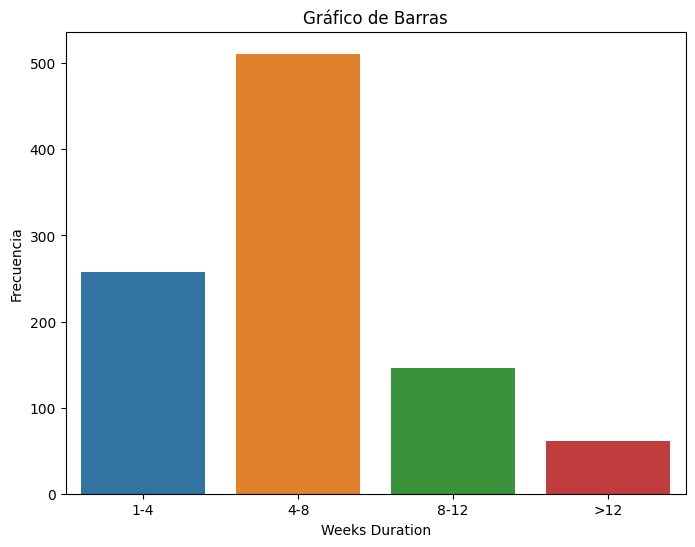

In [52]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.barplot(x=frec.index, y=frec.values)  # Creación del gráfico de barras
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Weeks Duration')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

### Price

In [53]:
df_edx['price'].value_counts()

FREE-Add a Verified Certificate for $49 USD        270
FREE-Add a Verified Certificate for $99 USD        137
FREE-Add a Verified Certificate for $50 USD         96
FREE-Add a Verified Certificate for $199 USD        85
FREE-Add a Verified Certificate for $149 USD        78
FREE-Add a Verified Certificate for $25 USD         49
FREE-Add a Verified Certificate for $139 USD        33
FREE-Add a Verified Certificate for $150 USD        30
FREE-Add a Verified Certificate for $249 USD        26
FREE-Add a Verified Certificate for $79 USD         21
FREE-Add a Verified Certificate for $169 USD        19
FREE-Add a Verified Certificate for $29 USD         15
FREE-Add a Verified Certificate for $39 USD         13
FREE-Add a Verified Certificate for $299 USD         9
FREE-Add a Verified Certificate for $129 USD         9
FREE-Add a Verified Certificate for $125 USD         8
FREE-Add a Verified Certificate for $5 USD           7
FREE-Add a Verified Certificate for $59 USD          7
FREE-Add a

Dada que la situacion de los precios de los cursos es que son gratis, pero el certificado es lo que se debe abonar, se procederá a la suposición de que los interesados e inscriptos en cada curso, pagarán este certificado al finalizarlo. Se realiza esta suposición para poder llegar a conclusiones economicas, a sabiendas de que no necesariamente es la realidad de que el 100% de inscriptos abone el certificado.

In [54]:
df_edx['price'] = df_edx['price'].str.extract('(\d+)')


In [55]:
df_edx['price']

0       49
1       49
2       90
3      199
4      249
      ... 
970     25
971    139
972    139
973     25
974     79
Name: price, Length: 975, dtype: object

In [56]:
df_edx['price'] = df_edx['price'].astype(int)


Se convirtio la columna en simplemente el valor en dolares certificado, simulando precio del curso, segun la suposicion antes planteada.

A continuación se creará una nueva columna segmentando los precios.

In [57]:
df_edx['price'].describe()

count    975.000000
mean     100.458462
std       69.569076
min        5.000000
25%       49.000000
50%       79.000000
75%      149.000000
max      450.000000
Name: price, dtype: float64

In [58]:
categories = ['0-50', '50-100', '100-150', '>150']
limits = [0, 50, 100, 150, 450]

In [59]:
df_edx['categ_price'] = pd.cut(df_edx['price'], bins=limits, labels=categories)

In [60]:
df_edx['categ_price'].value_counts()

0-50       462
50-100     186
>150       166
100-150    161
Name: categ_price, dtype: int64

In [61]:
frec = df_edx['categ_price'].value_counts()

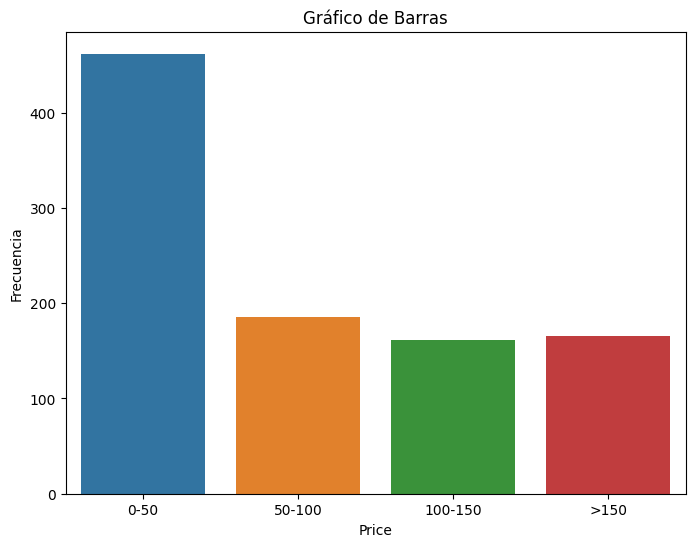

In [62]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.barplot(x=frec.index, y=frec.values)  # Creación del gráfico de barras
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Price')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

In [63]:
df_edx.head(1)

,title,n_enrolled,Level,subject,language,weeks_duration,price,on_demand,categ_price
0,How to Learn Online,124980,Introductory,Education & Teacher Training,English,1-4,49,True,0-50


## Registros duplicados

In [64]:
df_edx.duplicated().sum()

1

In [65]:
df_edx[df_edx.duplicated()]

,title,n_enrolled,Level,subject,language,weeks_duration,price,on_demand,categ_price
95,Introduction to Probability,97291,Intermediate,Data Analysis & Statistics,English,8-12,99,True,50-100


In [66]:
df_edx = df_edx.drop_duplicates()

In [67]:
df_edx = df_edx.reset_index(drop=True)
df_edx.shape[0]

974

## Nuevas Columnas

### Ventas

Se calcula la columna ventas como:
Ventas = Precio * subs

In [74]:
df_edx['sales'] = df_edx['price'] * df_edx['n_enrolled']

### Comisiones

Según la politica de reparto de beneficios de EDX, le corresponde un 10% del valor del curso al instructor o plantel de instructores. 

Fuente: https://www.edx.org/es/affiliate-program

El mismo se procede a calcular como:

Comisiones = Price * 0.10

In [68]:
df_edx['comisiones'] = df_edx['price'] * 0.10

### Costos

Calculamos el costo por comisiones, siendo:
Costos = comisiones * subsicrptores

In [69]:
df_edx['costos'] = df_edx['comisiones'] * df_edx['n_enrolled']

In [75]:
df_edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   title           974 non-null    object  
 1   n_enrolled      974 non-null    int32   
 2   Level           974 non-null    object  
 3   subject         974 non-null    object  
 4   language        974 non-null    object  
 5   weeks_duration  974 non-null    category
 6   price           974 non-null    int32   
 7   on_demand       974 non-null    bool    
 8   categ_price     974 non-null    category
 9   comisiones      974 non-null    float64 
 10  costos          974 non-null    float64 
 11  sales           974 non-null    int32   
dtypes: bool(1), category(2), float64(2), int32(3), object(4)
memory usage: 60.4+ KB


In [71]:
df_edx.describe()

,n_enrolled,price,comisiones,costos
count,9.740000e+02,974.000000,974.000000,9.740000e+02
mean,4.962619e+04,100.459959,10.045996,5.363300e+05
std,1.119150e+05,69.604801,6.960480,1.264231e+06
min,5.001000e+03,5.000000,0.500000,3.119000e+03
25%,1.268525e+04,49.000000,4.900000,8.572305e+04
50%,2.413000e+04,79.000000,7.900000,1.915537e+05
75%,4.880900e+04,149.000000,14.900000,4.801870e+05
max,2.442271e+06,450.000000,45.000000,2.198044e+07


In [72]:
df_edx

,title,n_enrolled,Level,subject,language,weeks_duration,price,on_demand,categ_price,comisiones,costos
0,How to Learn Online,124980,Introductory,Education & Teacher Training,English,1-4,49,True,0-50,4.9,612402.0
1,Programming for Everybody (Getting Started wit...,293864,Introductory,Computer Science,English,4-8,49,True,0-50,4.9,1439933.6
2,CS50's Introduction to Computer Science,2442271,Introductory,Computer Science,English,8-12,90,True,50-100,9.0,21980439.0
3,The Analytics Edge,129555,Intermediate,Data Analysis & Statistics,English,>12,199,False,>150,19.9,2578144.5
4,Marketing Analytics: Marketing Measurement Str...,81140,Introductory,Computer Science,English,1-4,249,True,>150,24.9,2020386.0
...,...,...,...,...,...,...,...,...,...,...,...
969,Leaders in Citizen Security and Justice Manage...,24130,Intermediate,Social Sciences,English,8-12,25,True,0-50,2.5,60325.0
970,Pattern Studying and Making | 图案审美与创作,24130,Introductory,Art & Culture,Otros,8-12,139,True,100-150,13.9,335407.0
971,Computational Neuroscience: Neuronal Dynamics ...,11246,Advanced,Biology & Life Sciences,English,4-8,139,True,100-150,13.9,156319.4
972,Cities and the Challenge of Sustainable Develo...,8775,Introductory,Environmental Studies,English,1-4,25,True,0-50,2.5,21937.5


Exportamos el csv

In [76]:
df_edx.to_csv('Datasets/edx_clean.csv',index=False)